In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

import numpy as np

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sn

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import statsmodels.formula.api as smf
import statsmodels

pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
plt.style.use('ggplot') # specifies that graphs should use ggplot styling
%matplotlib inline

In [2]:
import statsmodels
print(statsmodels.__version__)

0.13.2


In [3]:
print("pandas version: {}".format(pd.__version__))
print("statsmodels version: {}".format(statsmodels.__version__))

pandas version: 1.4.3
statsmodels version: 0.13.2


In [4]:
crimeraw = pd.read_csv('https://raw.githubusercontent.com/DianaMathai/qm2/main/thisdata.csv')

In [5]:
crimeraw.shape

(4835, 12)

There are 4835 observations or survey responses and 12 variables in the dataset.
Note that we will use 'Number of Burglary2012' as the dependent variable (y) and the others as independent variables (x).

In [6]:
crimeraw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4835 entries, 0 to 4834
Data columns (total 12 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Unnamed: 0                                                             4835 non-null   int64  
 1   lsoa                                                                   4835 non-null   object 
 2   Names                                                                  4835 non-null   object 
 3   Number of Burglary2012                                                 4835 non-null   int64  
 4   Average time                                                           4835 non-null   float64
 5   Aged 65+Percentage                                                     4835 non-null   float64
 6   Working-age                                                            4835 non-null   i

There are 4835 observations or survey responses and 12 variables in the dataset.
 
- Lsoa: Categorical (object)
- Names: Categorical (object)
- Number of Burglary2012: Numerical (including int64 and float64)
- Average time: Numerical (including int64 and float64)
- Aged 65+Percentage: Numerical (including int64 and float64)
- Working-age: Numerical (including int64 and float64)
- Area: Numerical (including int64 and float64)
- Population Density Persons per hectare: Numerical (including int64 and float64)
- % of households with no adults in employment: Numerical (including int64 and float64)
- Median house income 2011/12: Numerical (including int64 and float64)
- Average median house price(2010-2012): Numerical (including int64 and float64)

In [7]:
crimeraw.columns

Index(['Unnamed: 0', 'lsoa', 'Names', 'Number of Burglary2012', 'Average time',
       'Aged 65+Percentage', 'Working-age', 'Area (Hectares)',
       'Population Density Persons per hectare',
       '% of households with no adults in employment: With dependent children',
       'Median house income 2011/12', 'Average median house price(2010-2012)'],
      dtype='object')

In [8]:
crimeraw.head()

,Unnamed: 0,lsoa,Names,Number of Burglary2012,Average time,Aged 65+Percentage,Working-age,Area (Hectares),Population Density Persons per hectare,% of households with no adults in employment: With dependent children,Median house income 2011/12,Average median house price(2010-2012)
0,0,E01000001,City of London 001A,1,18.6100,20.0100,1042,13.0000,113,1,"65,520.0000","516,492.0000"
1,1,E01000002,City of London 001B,1,18.8600,20.2900,1007,22.8000,64,1,"66,300.0000","537,917.0000"
2,2,E01000003,City of London 001C,0,14.2500,18.3000,1037,5.9000,240,2,"54,140.0000","334,500.0000"
3,3,E01000005,City of London 001E,1,19.3700,13.1200,715,19.0000,53,3,"46,740.0000","326,667.0000"
4,4,E01000006,Barking and Dagenham 016A,16,9.3800,7.5800,1221,14.7000,122,6,"62,460.0000","239,017.0000"


cleaning names 

In [9]:
crimeraw = crimeraw.rename(columns = {'Number of Burglary2012':'Burglary_2012',
                          'Average time':'AvgTime','Aged65+(%)':'Aged65Pecentage','Area(Ha)':'Area_Ha',
                          'Working-age':'WorkingAge', 'Population Density Persons per hectare': 'PopDensitypph', 'MedianHouseIncome(2011-12)': 'MedianHouseIncome_2011-12', 'AvgMedianHousePrice(2010-2012)': 'AvgMedianHousePrice_2010-2012'})
print(crimeraw.columns)

Index(['Unnamed: 0', 'lsoa', 'Names', 'Burglary_2012', 'AvgTime',
       'Aged 65+Percentage', 'WorkingAge', 'Area (Hectares)', 'PopDensitypph',
       '% of households with no adults in employment: With dependent children',
       'Median house income 2011/12', 'Average median house price(2010-2012)'],
      dtype='object')


Dropping Variables, to limit errors as a check

In [10]:
crimeraw_try1 = crimeraw.drop(['% of households with no adults in employment: With dependent children', 'Unnamed: 0',], axis=1)

In [11]:
crimeraw_try1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4835 entries, 0 to 4834
Data columns (total 10 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   lsoa                                   4835 non-null   object 
 1   Names                                  4835 non-null   object 
 2   Burglary_2012                          4835 non-null   int64  
 3   AvgTime                                4835 non-null   float64
 4   Aged 65+Percentage                     4835 non-null   float64
 5   WorkingAge                             4835 non-null   int64  
 6   Area (Hectares)                        4835 non-null   float64
 7   PopDensitypph                          4835 non-null   int64  
 8   Median house income 2011/12            4835 non-null   float64
 9   Average median house price(2010-2012)  4835 non-null   float64
dtypes: float64(5), int64(3), object(2)
memory usage: 377.9+ KB


In [12]:
crimeraw_try1.head()

,lsoa,Names,Burglary_2012,AvgTime,Aged 65+Percentage,WorkingAge,Area (Hectares),PopDensitypph,Median house income 2011/12,Average median house price(2010-2012)
0,E01000001,City of London 001A,1,18.6100,20.0100,1042,13.0000,113,"65,520.0000","516,492.0000"
1,E01000002,City of London 001B,1,18.8600,20.2900,1007,22.8000,64,"66,300.0000","537,917.0000"
2,E01000003,City of London 001C,0,14.2500,18.3000,1037,5.9000,240,"54,140.0000","334,500.0000"
3,E01000005,City of London 001E,1,19.3700,13.1200,715,19.0000,53,"46,740.0000","326,667.0000"
4,E01000006,Barking and Dagenham 016A,16,9.3800,7.5800,1221,14.7000,122,"62,460.0000","239,017.0000"


Exploratory data analysis

In [13]:
crimeraw_try1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4835 entries, 0 to 4834
Data columns (total 10 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   lsoa                                   4835 non-null   object 
 1   Names                                  4835 non-null   object 
 2   Burglary_2012                          4835 non-null   int64  
 3   AvgTime                                4835 non-null   float64
 4   Aged 65+Percentage                     4835 non-null   float64
 5   WorkingAge                             4835 non-null   int64  
 6   Area (Hectares)                        4835 non-null   float64
 7   PopDensitypph                          4835 non-null   int64  
 8   Median house income 2011/12            4835 non-null   float64
 9   Average median house price(2010-2012)  4835 non-null   float64
dtypes: float64(5), int64(3), object(2)
memory usage: 377.9+ KB


<AxesSubplot:xlabel='WorkingAge', ylabel='Burglary_2012'>

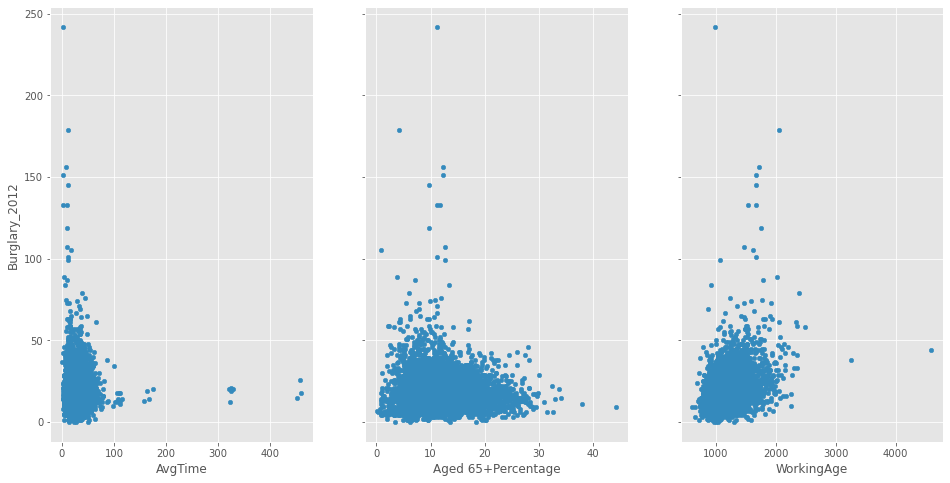

In [14]:
fig, axs = plt.subplots(1, 3, sharey=True)
crimeraw_try1.plot(kind='scatter', x='AvgTime', y='Burglary_2012', ax=axs[0], figsize=(16, 8))
crimeraw_try1.plot(kind='scatter', x='Aged 65+Percentage', y='Burglary_2012', ax=axs[1])
crimeraw_try1.plot(kind='scatter', x='WorkingAge', y='Burglary_2012', ax=axs[2])

<AxesSubplot:xlabel='Median house income 2011/12', ylabel='Burglary_2012'>

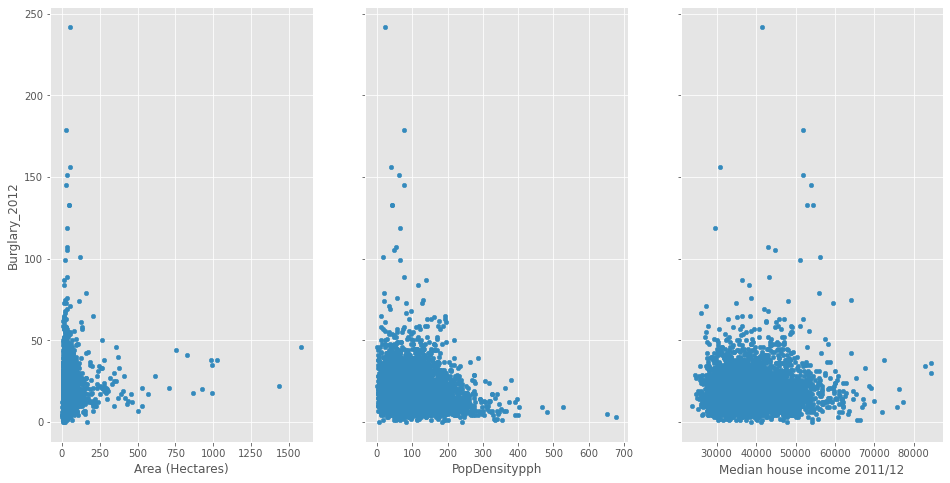

In [15]:
fig, axs = plt.subplots(1, 3, sharey=True)
crimeraw_try1.plot(kind='scatter', x='Area (Hectares)', y='Burglary_2012', ax=axs[0], figsize=(16, 8))
crimeraw_try1.plot(kind='scatter', x='PopDensitypph', y='Burglary_2012', ax=axs[1])
crimeraw_try1.plot(kind='scatter', x='Median house income 2011/12', y='Burglary_2012', ax=axs[2])

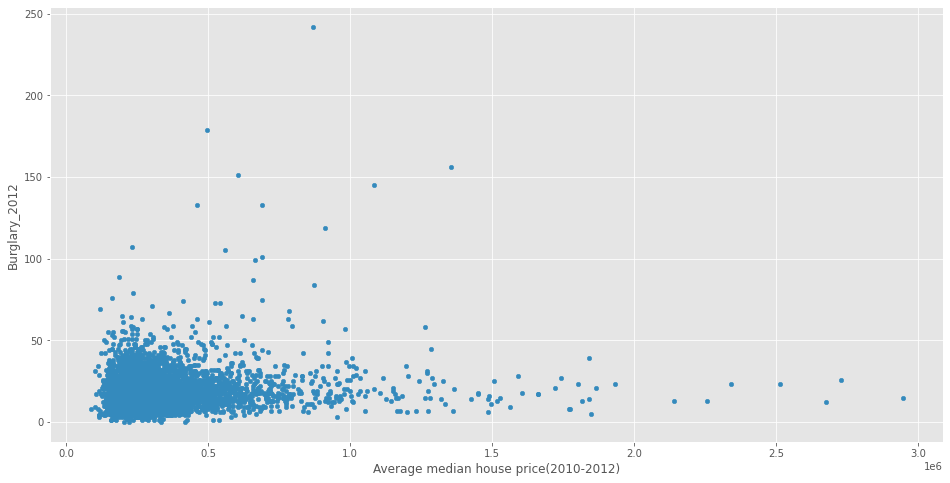

In [16]:
fig, axs = plt.subplots()
crimeraw_try1.plot(kind='scatter', x='Average median house price(2010-2012)', y='Burglary_2012', ax=axs, figsize=(16, 8))
plt.show()

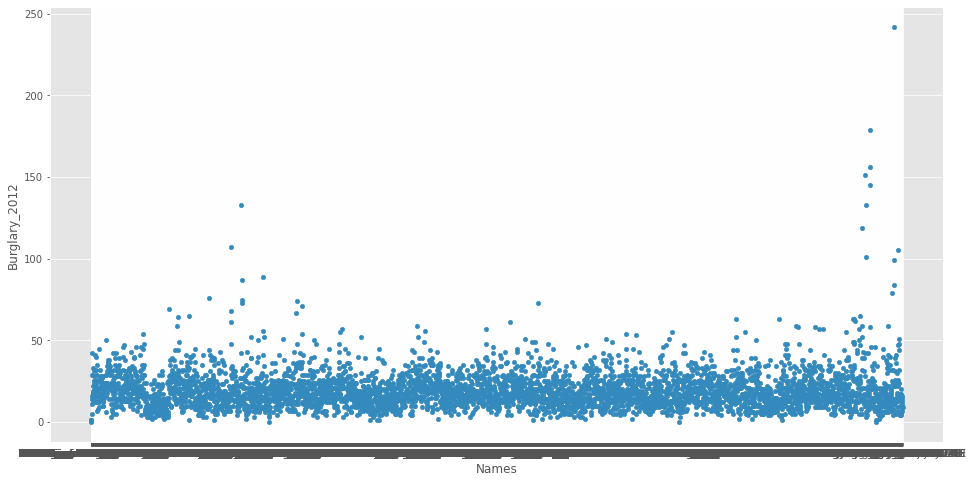

In [17]:
fig, axs = plt.subplots()
crimeraw_try1.plot(kind='scatter', x='Names', y='Burglary_2012', ax=axs, figsize=(16, 8))
plt.show()

In [18]:
crimeraw.shape

(4835, 12)

In [ ]:
crimeraw_try1 = crimeraw.drop(['lsoa', 'Unnamed: 0',], axis=1)

Converting categorical variables into dummy variables

In [19]:
crimeraw_numeric = pd.get_dummies(crimeraw)

In [20]:
crimeraw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4835 entries, 0 to 4834
Data columns (total 12 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Unnamed: 0                                                             4835 non-null   int64  
 1   lsoa                                                                   4835 non-null   object 
 2   Names                                                                  4835 non-null   object 
 3   Burglary_2012                                                          4835 non-null   int64  
 4   AvgTime                                                                4835 non-null   float64
 5   Aged 65+Percentage                                                     4835 non-null   float64
 6   WorkingAge                                                             4835 non-null   i

Text(0.5, 1.0, 'Correlation Matrix')

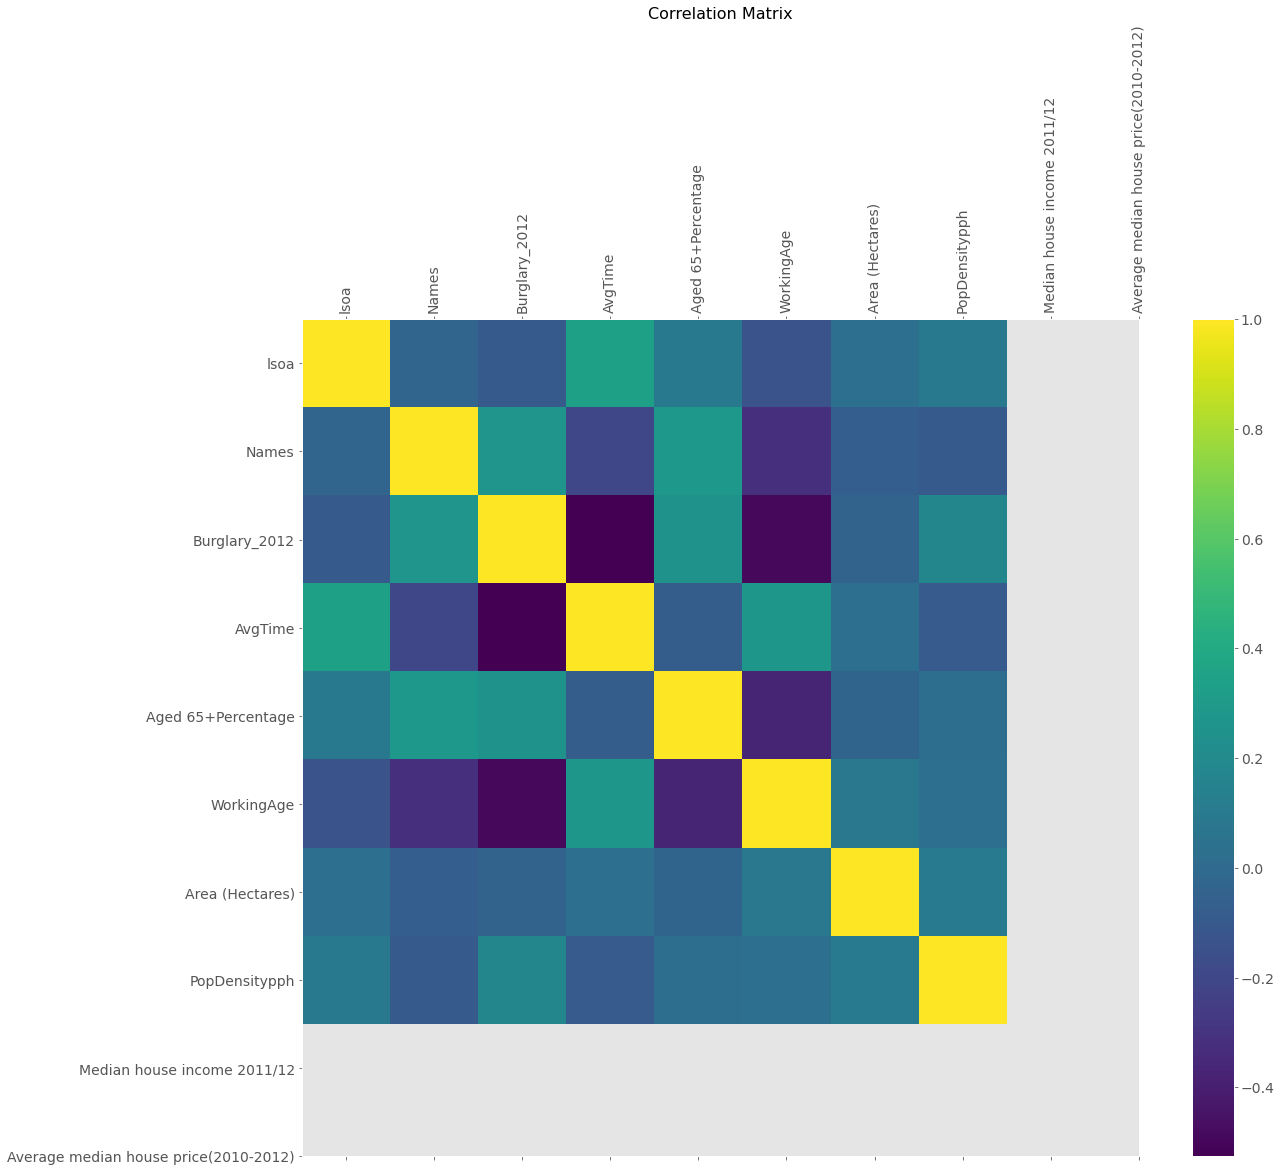

In [21]:
df = crimeraw_try1
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=90)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

In [22]:
crimeraw_data2 = pd.read_csv('https://raw.githubusercontent.com/DianaMathai/qm2/main/planB-data1.csv')

In [23]:
crimeraw_data2.shape

(32, 7)

In [24]:
crimeraw_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Code                           32 non-null     object 
 1   Borough                        32 non-null     object 
 2   crime_rate                     32 non-null     float64
 3   ER_wa_white_UK_born            32 non-null     float64
 4   ER_wa_ethnic_minority_UK_born  32 non-null     float64
 5   earning_less_than_LLW          32 non-null     float64
 6   homeless_in_1000               32 non-null     float64
dtypes: float64(5), object(2)
memory usage: 1.9+ KB


In [25]:
crimeraw_data2.head()

,Code,Borough,crime_rate,ER_wa_white_UK_born,ER_wa_ethnic_minority_UK_born,earning_less_than_LLW,homeless_in_1000
0,E09000002,Barking and Dagenham,70.9000,59.2000,64.9000,27.7000,7.0500
1,E09000003,Barnet,55.8000,72.2000,66.6000,28.5000,4.2300
2,E09000004,Bexley,45.6000,77.3000,85.7000,32.4000,5.1800
3,E09000005,Brent,70.8000,74.8000,64.6000,32.8000,4.5700
4,E09000006,Bromley,52.7000,79.0000,65.2000,27.9000,5.9800


Text(0.5, 1.0, 'Correlation Matrix')

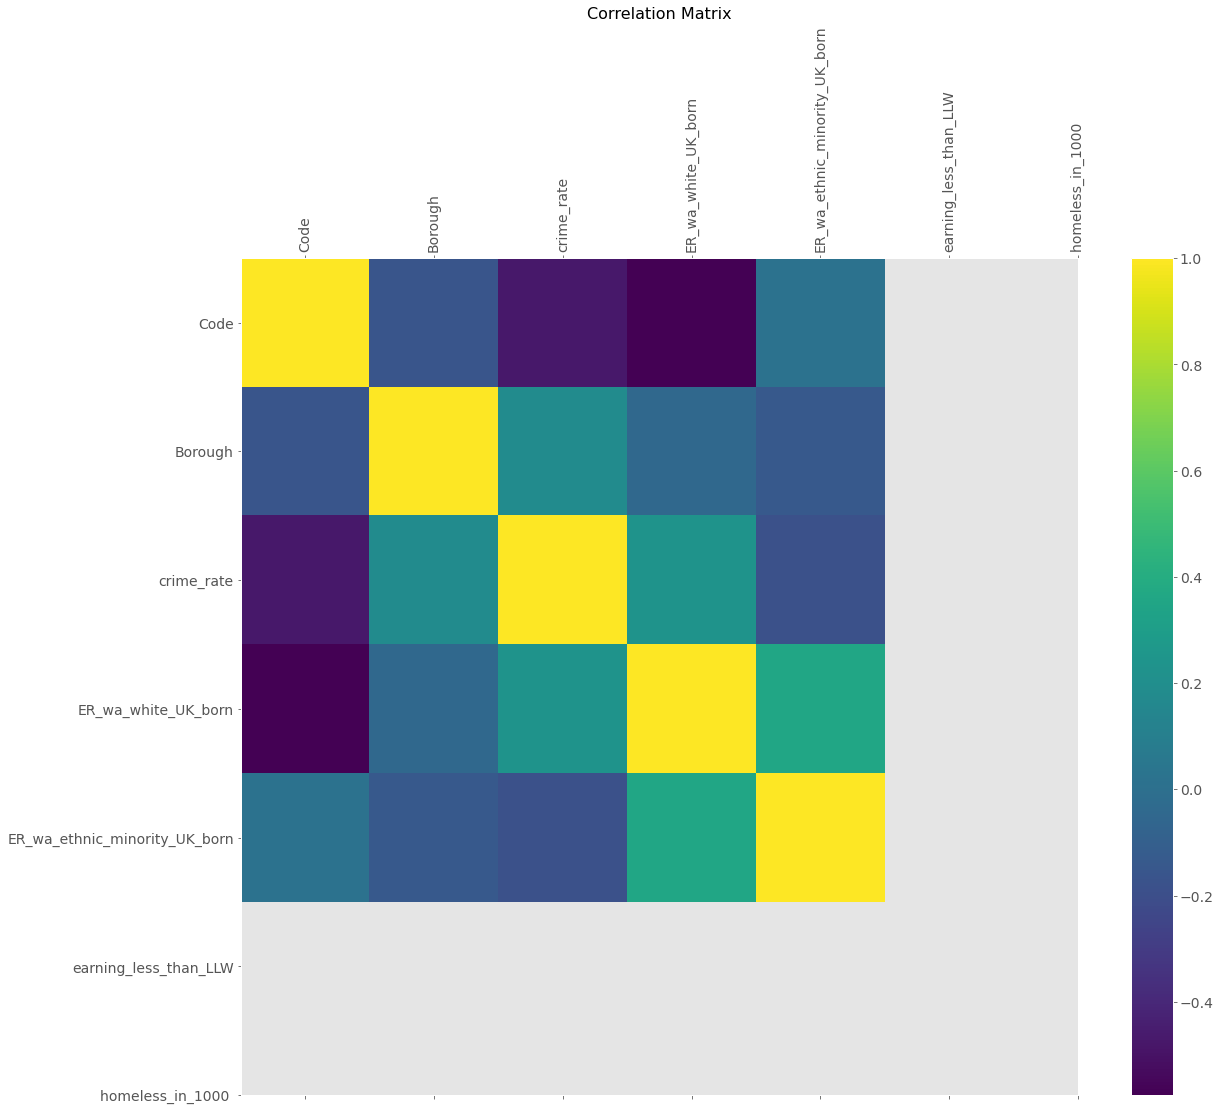

In [26]:
df = crimeraw_data2
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=90)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)